# **Predicting asthma hospital visits based on air pollution levels-Modeling**

## **Capstone Project Two : Springboard Data Science career track**

### **Introduction:**

### **1. The Problem:**

The core issue addressed in this study is the relationship between air quality and respiratory problems, specifically asthma-related hospital visits, in New York City. This project aims to determine whether atmospheric pollutants significantly impact the frequency of asthma-related hospital visits among NYC's residents.

New York City, being a densely populated urban area, faces notable challenges related to air pollution. This study is crucial given the increasing concerns about environmental health, urban living, and sustainable city planning. The findings will have significant implications for policy decisions, public health initiatives, and raising individual awareness about the health impacts of air quality.

### **2. The Data:**

The data utilized in this study is sourced from the NYC Environment & Health Data Portal (NYC.gov), which provides comprehensive information on environmental pollutants and their health impacts. The dataset was downloaded from the NYC.gov website.

### **3. Research questions:**

This data analysis and story-telling report is organized around the following questions of interest:

* How are NO2 and PM2.5 levels correlated with the number of hospital visits due to asthma?


* How do pollutants levels vary across different GeoTypes in New York City?
* How have NO2 and PM2.5 levels changed over the years, and how does this trend correlate with the number of asthma-related hospital visits?
* Can we develop a predictive model to forecast the number of asthma-related hospital visits based on NO2 and PM2.5 levels?


### **4. Import the necessary libraries and the data:**

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. These are some data wrangling and exploratory analysis from the previous parts. For detailed EDA, see the following:

https://github.com/Mary080102/Capston-Two/blob/702e2d32a0447fadb3b12368cb84e63dc31e0d75/Air%20quality-%20Exploratory%20Data%20Analysis.ipynb.ipynb

https://github.com/Mary080102/Capston-Two/blob/702e2d32a0447fadb3b12368cb84e63dc31e0d75/Pre-processing%20and%20Training%20Data%20Development.ipynb


### **4.1.Import libraries**

In [1]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVR

import matplotlib.pyplot as plt


### **4.2.Load the Data**

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_transformed')

In [3]:
#Exploring data
df.head()

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,80.0,21.7,7.5,False,True,False,False
1,2020,81.0,21.3,8.5,False,True,False,False
2,2020,661.0,19.4,7.5,False,True,False,False
3,2020,364.0,22.5,8.0,False,True,False,False
4,2020,116.0,26.3,9.2,False,True,False,False


### **5. Data preperation and the feature selection:**

Based on the results from previouse step(EDA)and correlation matrix the following features will be considered:

* GeoType_Borough
* GeoType_CD
* GeoType_Citywide
* GeoType_UHF42
* Year
* Number(The number of adults who make emergency hospital visits due to asthma)
* no2/Mean ppb (mean of NO2)
* pm/Mean mcg/m3 (mean PM2.5)


### **6. Applying the Machine Learning models:**

This is a regression problem, in supervised learning. Here we have used the following regression models:

1. Multiple Linear Regression

2. Ridge Regression (Regularized Linear Regression)

3. Gradient Boosting Machines

3. Random Forest

4. Support Vector Regression Model(SVR)


### **6.1.Train/Test Split**

While this dataset is cleaned in the previouse section, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set. Based on the results from the previous section (pre-processing), standardized data was chosen due to the non-Gaussian distribution of the data

In [4]:
# df[['Number']] = StandardScaler().fit_transform(df[['Number']])
df[['Number', 'no2/Mean ppb', 'pm/Mean mcg/m3']] = StandardScaler().fit_transform(df[['Number', 'no2/Mean ppb', 'pm/Mean mcg/m3']])

In [5]:
df

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,-0.384069,0.921234,0.175191,False,True,False,False
1,2020,-0.383987,0.818190,0.912948,False,True,False,False
2,2020,-0.336617,0.328731,0.175191,False,True,False,False
3,2020,-0.360874,1.127321,0.544069,False,True,False,False
4,2020,-0.381129,2.106239,1.429378,False,True,False,False
...,...,...,...,...,...,...,...,...
342,2009,1.279618,1.539497,2.388462,True,False,False,False
343,2009,0.793089,4.064073,3.937752,True,False,False,False
344,2009,0.475298,1.050038,2.019584,True,False,False,False
345,2009,-0.158405,-0.341055,1.872032,True,False,False,False


In [6]:
#Separate the features and the target variable
X=df.drop(columns=['Number'])
y=df['Number']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (277, 7)
X_test shape: (70, 7)
y_train shape: (277,)
y_test shape: (70,)


### **6.2.Multiple Linear Regression Model**

In [7]:
model1=  LinearRegression()
model1.fit(X_train,y_train)
y_pred= model1.predict(X_test)

In [8]:
#  validate
mse_mlr = mean_squared_error(y_test,y_pred)

mae_mlr= mean_absolute_error(y_test,y_pred)

r2_mlr = r2_score(y_test, y_pred)
print(f"Multiple Linear Regression:\n MSE={mse_mlr},\n MAE={mae_mlr},\nR2={r2_mlr}")

Multiple Linear Regression:
 MSE=0.06710246451124319,
 MAE=0.14872692143678354,
R2=0.9108595703918301


While the R2 score indicates that the model explains a significant portion of the variance in the target variable, the high values of MSE and MAE suggest that the actual predictions may still be quite far from the actual values. This could indicate the presence of outliers, a non-linear relationship between features, or other complexities in the data that the linear model is not capturing effectively.

In [9]:
#Assessing performance using cross-validation

cv_scores_test = cross_val_score(model1,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(model1,X_train,y_train,cv=5,scoring='r2')
print(cv_scores_test)
cv_scores_model1_test=cv_scores_test.mean()
cv_scores_model1_train=cv_scores_train.mean()
cv_scores_std_model1=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model1_test))
print ('Mean cross validation train score: ' +str(cv_scores_model1_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model1))

[ 0.07465337 -0.84401482  0.77134125  0.04870249  0.84620906]
Mean cross validation test score: 0.17937827185731994
Mean cross validation train score: 0.9079928322961275
Standard deviation in cv scores: 0.6116306629961322


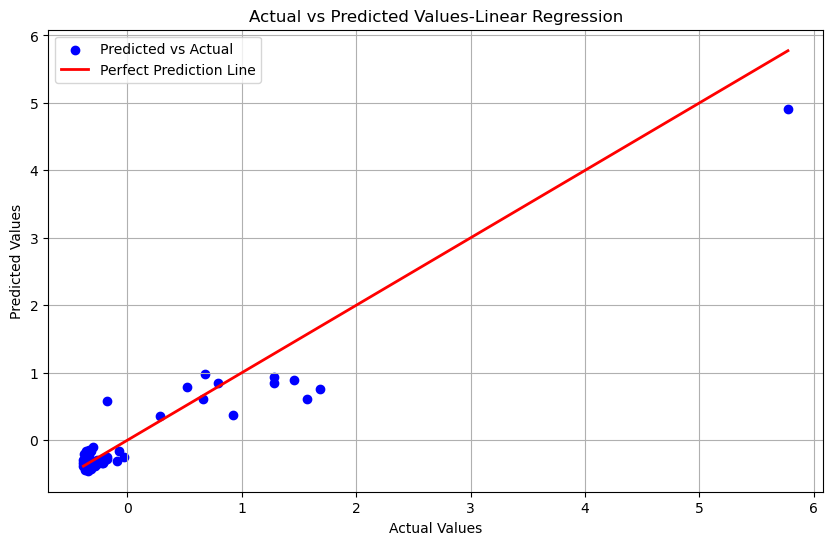

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### **6.3 Ridge Regression (Regularized Linear Regression)**

In [11]:
# Initialize and fit the model

model2= Ridge(alpha=1.0)
model2.fit(X_train,y_train)

# Predict and evaluate
y_pred_ridge= model2.predict(X_test)


mse_ridge = mean_squared_error(y_test,y_pred_ridge)

mae_ridge= mean_absolute_error(y_test,y_pred_ridge)

r2_ridge = r2_score(y_test,y_pred_ridge)
print(f"Ridge Linear Regression:\n MSE={mse_ridge},\n MAE={mae_ridge},\nR2={r2_ridge}")

Ridge Linear Regression:
 MSE=0.07543430527007063,
 MAE=0.15568016588053182,
R2=0.899791364923098


In [12]:
#Assessing performance using cross-validation
cv_scores_test = cross_val_score(model2,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(model2,X_train,y_train,cv=5,scoring='r2')
print(cv_scores_test)
cv_scores_model2_test=cv_scores_test.mean()
cv_scores_model2_train=cv_scores_train.mean()
cv_scores_std_model2=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model2_test))
print ('Mean cross validation train score: ' +str(cv_scores_model2_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model2))


[ 0.10915449 -5.64992172  0.72598249 -0.16778947  0.84587638]
Mean cross validation test score: -0.8273395635114145
Mean cross validation train score: 0.9027044761095027
Standard deviation in cv scores: 2.4405649799436278


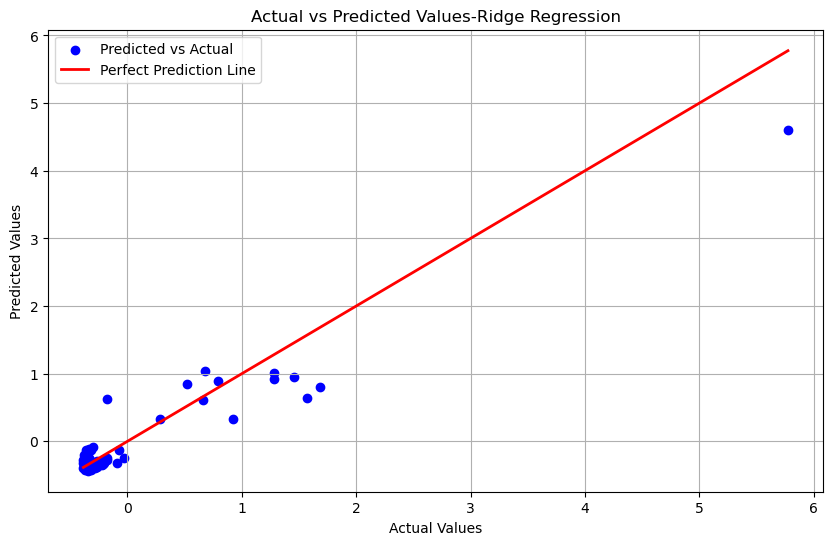

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

### **6.4.Gradient Boosting Machines (GBM)**



In [17]:
# Train GBM model
model3 = GradientBoostingRegressor()
model3.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm= model3.predict(X_test)

# Evaluate model performance
mse_gbm = mean_squared_error(y_test,y_pred_gbm)

mae_gbm= mean_absolute_error(y_test,y_pred_gbm)

r2_gbm = r2_score(y_test,y_pred_gbm)
print(f"Gradient Boosting Machines:\n MSE={mse_gbm},\n MAE={mae_gbm},\nR2={r2_gbm}")

Gradient Boosting Machines:
 MSE=0.028120462352420567,
 MAE=0.09487124995793303,
R2=0.9626441426088733


In [18]:
#Assessing performance using cross-validation
cv_scores_test = cross_val_score(model3,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(model3,X_train,y_train,cv=5,scoring='r2')
print(cv_scores_test)
cv_scores_model3_test=cv_scores_test.mean()
cv_scores_model3_train=cv_scores_train.mean()
cv_scores_std_model3=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model3_test))
print ('Mean cross validation train score: ' +str(cv_scores_model3_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model3))

[-0.04552472 -0.1530214   0.71387842 -0.10905661  0.78005635]
Mean cross validation test score: 0.23726640838214394
Mean cross validation train score: 0.9441243568737778
Standard deviation in cv scores: 0.41809447665538796


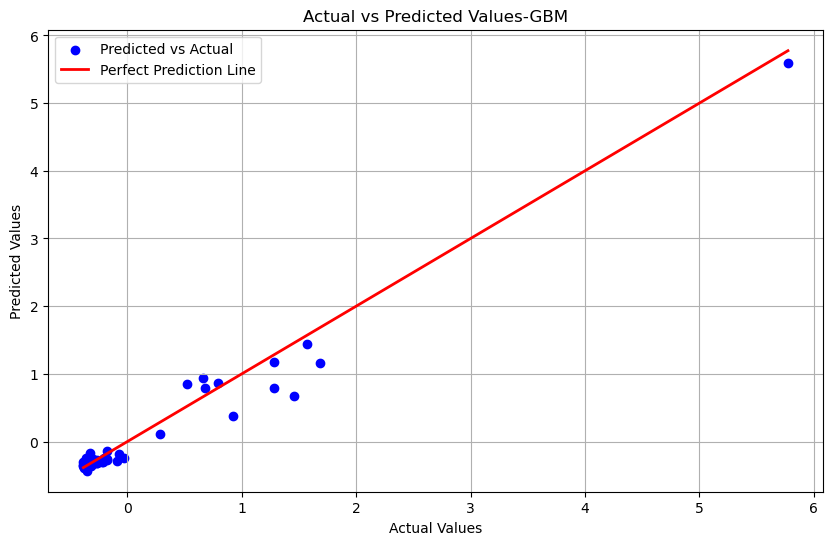

In [19]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')


# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-GBM')
plt.legend()
plt.grid(True)
plt.show()

### **6.5.Random Forest Model**

In [20]:
# Initialize and fit the model

model4= RandomForestRegressor(random_state=42)
model4.fit(X_train,y_train)

# Predict and evaluate

y_pred_rf= model4.predict(X_test)

mse_rf = mean_squared_error(y_test,y_pred_rf)

mae_rf= mean_absolute_error(y_test,y_pred_rf)

r2_rf = r2_score(y_test,y_pred_rf)
print(f"Random Forest:\n MSE={mse_rf},\n MAE={mae_rf},\nR2={r2_rf}")


Random Forest:
 MSE=0.03230723733636423,
 MAE=0.09588447922733999,
R2=0.9570823361467732


In [21]:
#Assessing performance using cross-validation
cv_scores_test = cross_val_score(model4,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(model4,X_train,y_train,cv=5,scoring='r2')
print(cv_scores_test)
cv_scores_model4_test=cv_scores_test.mean()
cv_scores_model4_train=cv_scores_train.mean()
cv_scores_std_model4=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model4_test))
print ('Mean cross validation train score: ' +str(cv_scores_model4_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model4))

[-0.02158394 -0.37234806  0.75495466  0.05751142  0.90061092]
Mean cross validation test score: 0.26382900069340376
Mean cross validation train score: 0.9440156971401088
Standard deviation in cv scores: 0.4848596431432712


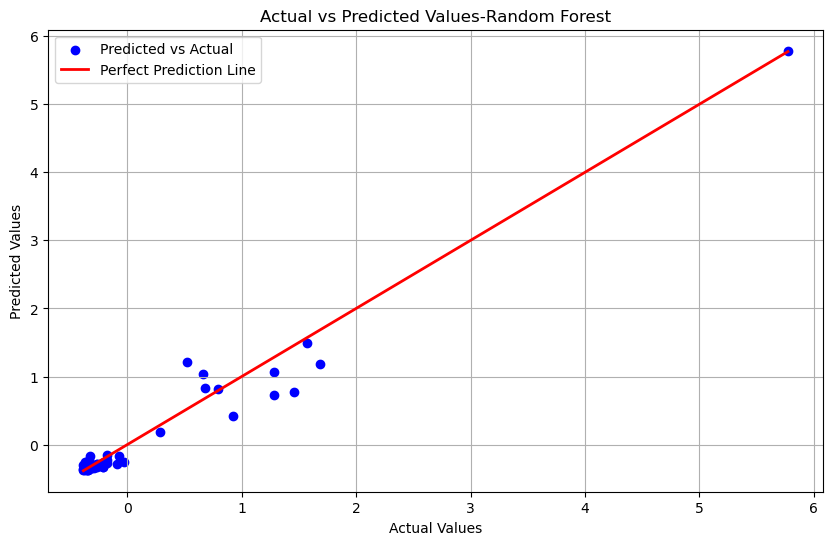

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Random Forest')
plt.legend()
plt.grid(True)
plt.show()

### **6.6.Support Vector Regression Model (SVR)**

For Gradient Boosting and SVR, the normalized data performed better than the standardized data. Therefore, these models require normalized data, and we should use X_train_norm and X_test_norm.

In [24]:
# Define the SVR model 
model5= SVR()

# Fit the model to the training data
model5.fit(X_train,y_train)

# Predict on the test set
y_pred_svr= model5.predict(X_test)

# Evaluate the model

mse_svr = mean_squared_error(y_test,y_pred_svr)

mae_svr= mean_absolute_error(y_test,y_pred_svr)

r2_svr = r2_score(y_test,y_pred_svr)
print(f"SVR:\n MSE={mse_svr},\n MAE={mae_svr},\nR2={r2_svr}")

SVR:
 MSE=0.8137951998710552,
 MAE=0.3553261094531552,
R2=-0.08106392601150736


In [25]:
#Assessing performance using cross-validation

cv_scores_test = cross_val_score(model5,X_test,y_test,cv=5,scoring='r2')
cv_scores_train= cross_val_score(model5,X_train,y_train,cv=5,scoring='r2')
print(cv_scores_test)
cv_scores_model5_test=cv_scores_test.mean()
cv_scores_model5_train=cv_scores_train.mean()
cv_scores_std_model5=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model5_test))
print ('Mean cross validation train score: ' +str(cv_scores_model5_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model5))

[-0.13237507 -0.36596938 -0.15934721 -0.10300899 -0.1816444 ]
Mean cross validation test score: -0.18846901107755035
Mean cross validation train score: -0.06958470089014016
Standard deviation in cv scores: 0.09257535484012912


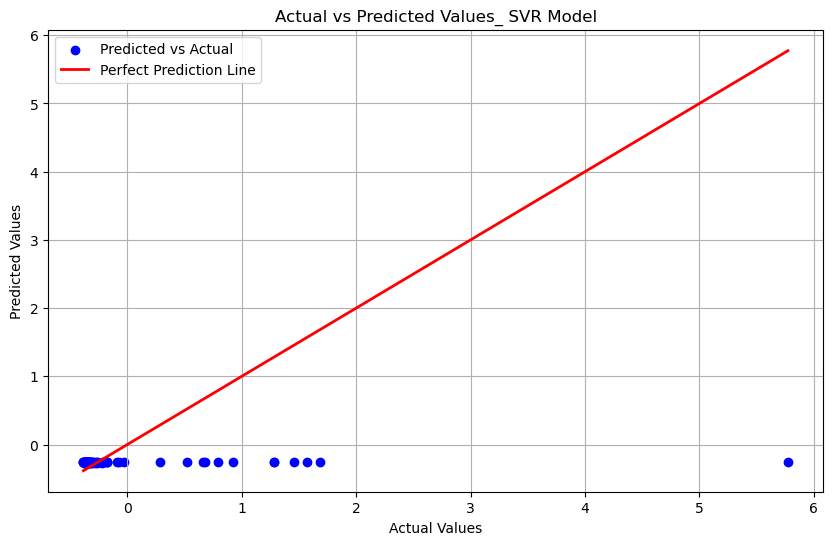

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values_ SVR Model')
plt.legend()
plt.grid(True)
plt.show()

### **6.7.Comparison and Model Selection**

We applied different ML models above and evaluated their performances using cross-validation for both the training and test data. Here we have tabulated the scores and plotted them.

In [27]:
# Model performance metrics
metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Gradient Boosting', 'Random Forest','SVR'],
    'R2': [r2_mlr, r2_ridge, r2_gbm, r2_rf,r2_svr],
    'MAE': [mae_mlr, mae_ridge, mae_gbm, mae_rf,mae_svr],
    'MSE': [mse_mlr, mse_ridge, mse_gbm, mse_rf,mse_svr],
}
# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Display the summary table
df_metrics

,Model,R2,MAE,MSE
0,Linear Regression,0.910860,0.148727,0.067102
1,Ridge Regression,0.899791,0.155680,0.075434
2,Gradient Boosting,0.962644,0.094871,0.028120
3,Random Forest,0.957082,0.095884,0.032307
4,SVR,-0.081064,0.355326,0.813795


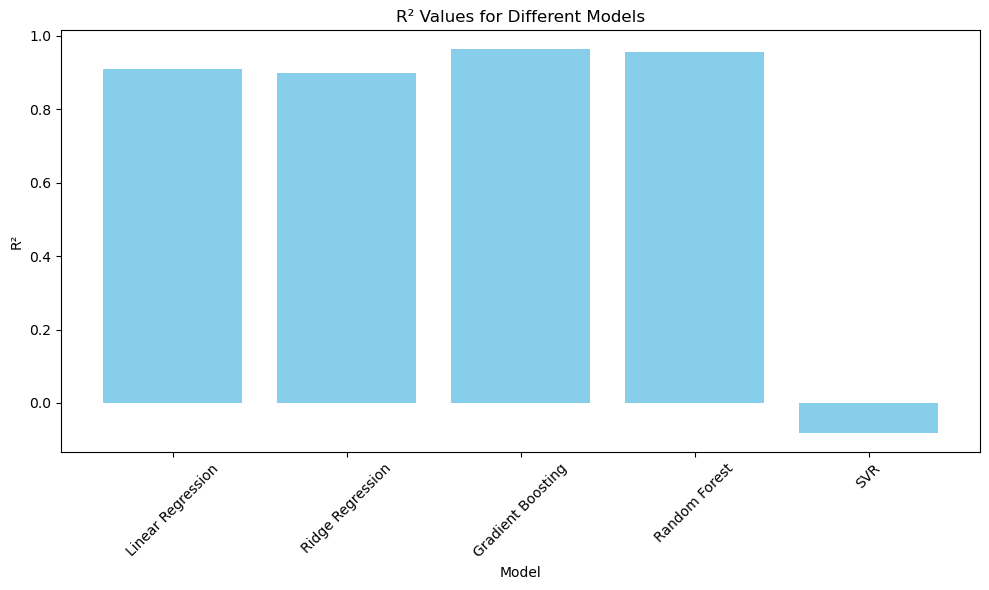

In [28]:
#plotting the accuracy scores

# Plot R2 values
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Model'], df_metrics['R2'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('R² Values for Different Models')
plt.xticks(rotation=45)

plt.tight_layout()
# Save the figure
plt.savefig('plot3.png')

plt.show()

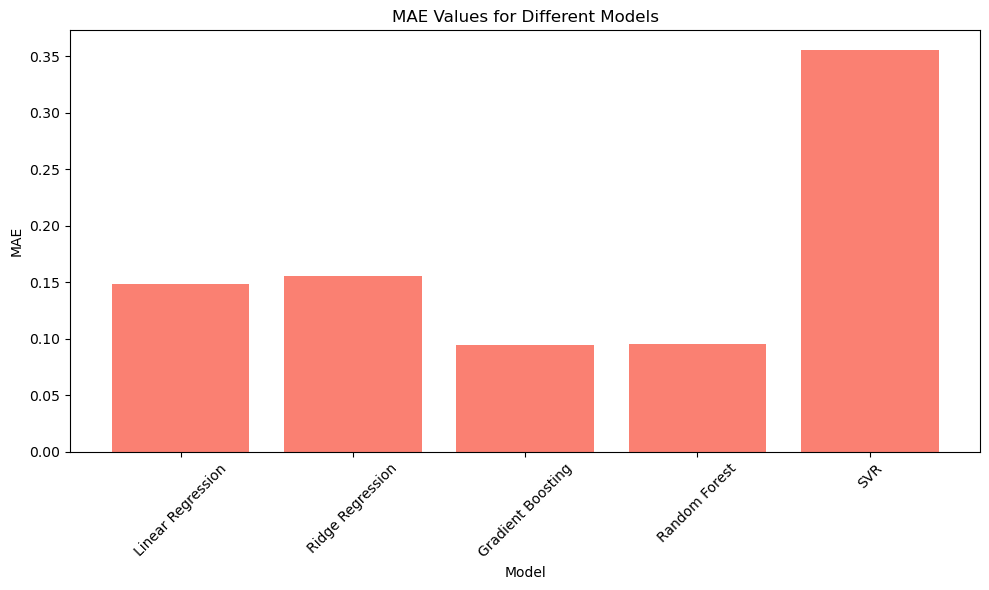

In [29]:
# Plot MAE values
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Model'], df_metrics['MAE'], color='salmon')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Values for Different Models')
plt.xticks(rotation=45)

plt.tight_layout()

# Save the figure
plt.savefig('plot4.png')

plt.show()

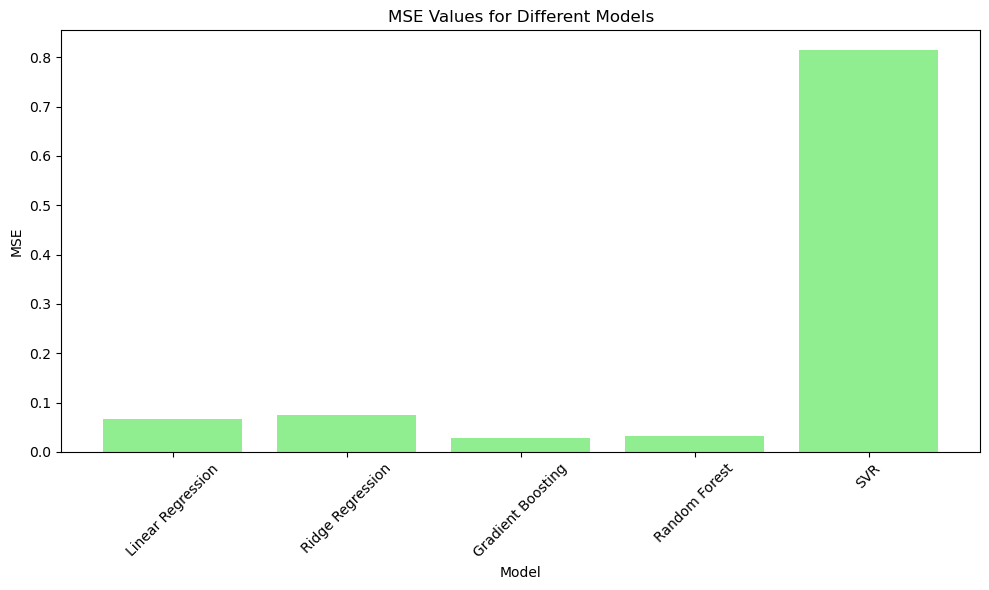

In [30]:
# Plot MSE values
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Model'], df_metrics['MSE'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Values for Different Models')
plt.xticks(rotation=45)


plt.tight_layout()
# Save the figure
plt.savefig('plot5.png')

plt.show()

Based on the above metrics results, **Random Forest** and **Gradian Boosting** are the best models among the ones compared. They have the highest R². However, the high values of MSE and MAE suggest that the actual predictions may still be quite far from the actual values. To make the process more accurate I want to use feature selection in the next step.


### **6.8.Feature importances for Random Forest Model**

 Perform feature selection using only the training set.

In [31]:
# Train the Random Forest model
model4.fit(X_train,y_train)

# Extract Feature Importances

importances= model4.feature_importances_
feature_names = X.columns  

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort feature importances in descending order
important_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)['Feature']
feature_importances

,Feature,Importance
0,Year,0.023485
1,no2/Mean ppb,0.048986
2,pm/Mean mcg/m3,0.019300
3,GeoType_Borough,0.091893
4,GeoType_CD,0.000101
5,GeoType_Citywide,0.816126
6,GeoType_UHF42,0.000110


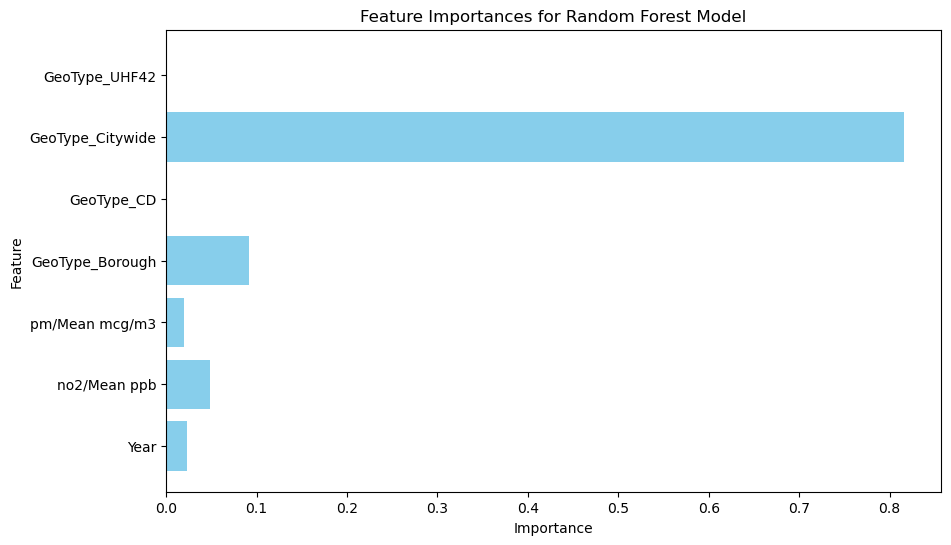

In [32]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Model')
plt.show()

Based on the above plot, features'GeoType_UHF42' and 'GeoType_CD' are not too important for Random Forest Model, so we have to drop these features and use most relevant features to predict our target variable.

In [33]:
# Reduce Dataset to Important Features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [34]:
X_test_reduced

,GeoType_Citywide,GeoType_Borough,no2/Mean ppb,Year,pm/Mean mcg/m3
322,True,False,0.174165,2013,0.986724
114,False,False,1.050038,2019,0.544069
325,False,True,2.724502,2012,2.683565
267,False,False,0.586341,2016,0.691621
307,False,True,1.616780,2016,1.281826
...,...,...,...,...,...
93,False,False,-0.856274,2020,-1.005221
179,False,False,-0.469860,2019,-0.710118
182,False,False,-1.191167,2019,-0.931445
196,False,False,-0.469860,2019,-0.488791


In [35]:
# Retrain the model with reduced features
model_retrained =  RandomForestRegressor(random_state=42) 
model_retrained.fit(X_train_reduced, y_train)

# Make predictions
y_pred_red = model_retrained.predict(X_test_reduced)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred_red)
r2 = r2_score(y_test, y_pred_red)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.03142443697286279
R² Score: 0.9582550680908821


Reducing the number of features does not significantly impact the performance of the model.

### **6.9.Feature importances for Gradient Boosting Model**

Perform feature selection using only the training set.

In [36]:
# Train the Gradient Boosting model
model3.fit(X_train,y_train)

# Extract Feature Importances

importances_gb= model3.feature_importances_
feature_names = X.columns  

feature_importances_gb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb})

# Sort feature importances in descending order
important_features_gb = feature_importances_gb.sort_values(by='Importance', ascending=False).head(5)['Feature']
feature_importances_gb

,Feature,Importance
0,Year,0.023856
1,no2/Mean ppb,0.044660
2,pm/Mean mcg/m3,0.011926
3,GeoType_Borough,0.094030
4,GeoType_CD,0.000129
5,GeoType_Citywide,0.825387
6,GeoType_UHF42,0.000013


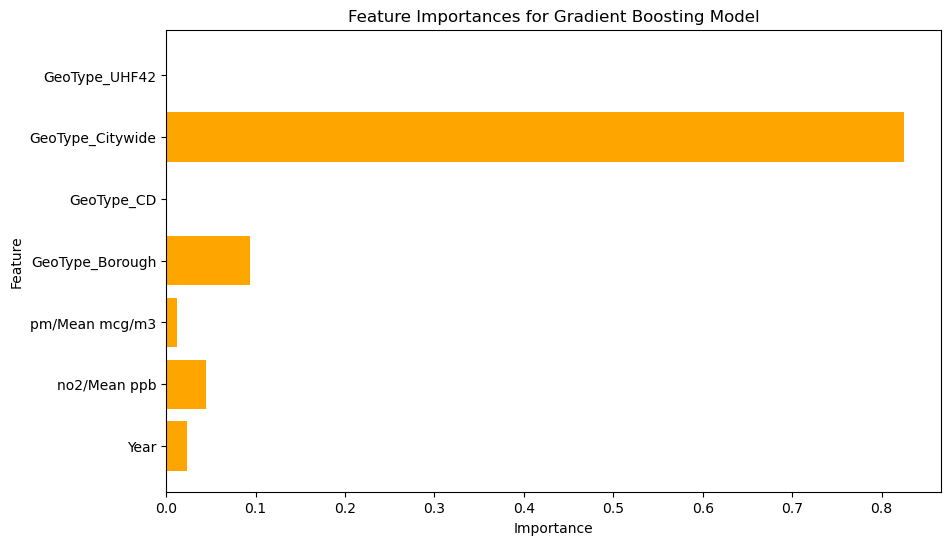

In [37]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_gb['Feature'], feature_importances_gb['Importance'], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Gradient Boosting Model')
plt.show()

Based on the above plot, the Random Forest model and the Gradient Boosting model exhibit the same feature importance.Therefore features'GeoType_UHF42' and 'GeoType_CD' are not too important for the Model, so we have to drop these features and use most relevant features to predict our target variable.So, we can use reduce dataset taht we created for the random forest model and retrain the model with reduced features.

In [38]:
# Retrain the model with reduced features
model_retrained_gb =  gba= GradientBoostingRegressor()

model_retrained_gb.fit(X_train_reduced, y_train)

# Make predictions
y_pred_red_gb = model_retrained_gb.predict(X_test_reduced)

# Performance Metrics
mse_gb = mean_squared_error(y_test, y_pred_red_gb)
r2_gb = r2_score(y_test, y_pred_red_gb)

print(f'Mean Squared Error: {mse_gb}')
print(f'R² Score: {r2_gb}')

Mean Squared Error: 0.027847427503850858
R² Score: 0.9630068482691911


Reducing the number of features has little impact on the model's performance. The R² value increased, and the MSE decreased.

**Before reduce feature:** 

**R2:** 0.963054
**MSE:** 4169325

**After reduce feature:**

**R2:** 0.96429
**MSE:** 4029526.3585

### **7.Applying Grid search CV for hyperparameter Tuning**

### **7.1. Parameter Tuning for Random Forest Regression**

In [39]:
# Define the model
rf= RandomForestRegressor(random_state=42)

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Grid Search CV
grid_search_rf= GridSearchCV(rf,param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_search_rf.fit(X_train_reduced,y_train)

# Get the best parameters and best model 
best_params_rf = grid_search_rf.best_params_

best_model2 = grid_search_rf.best_estimator_

#Best score achived during the grid search
best_score_rf = grid_search_rf.best_score_

print("Best Parameters:", best_params_rf)
print("Best R2 Score:", best_score_rf)


# predict on the test set

y_pred_rf2= best_model2.predict(X_test_reduced)

# Evaluate on the model
test_score_rf = best_model2.score(X_test_reduced, y_test)
print("Test Score:", test_score_rf)

mse_rf_2= mean_squared_error(y_test,y_pred_rf2)
r2_rf_2= r2_score(y_test,y_pred_rf2)
                 
print("Mean Squared Error on test set: ", mse_rf_2)
print("R2 score on test set: ", r2_rf_2)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.9460535809990022
Test Score: 0.9531378949158803
Mean Squared Error on test set:  0.03527650424337966
R2 score on test set:  0.9531378949158803


The high R2 scores (both during cross-validation and on the test set) suggest that the model is performing well and is able to explain a significant portion of the variance in the target variable.

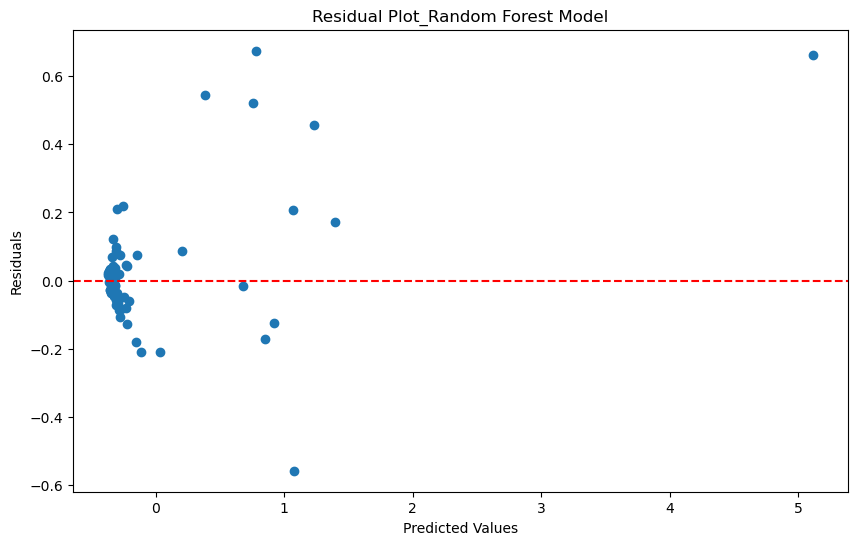

In [40]:
residuals = y_test - y_pred_rf2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf2, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot_Random Forest Model')

# Save the figure
plt.savefig('plot6.png')

plt.show()

In [41]:
cv_scores = cross_val_score(best_model2, X_train_reduced, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores: ", cv_scores)
print("Mean Cross-Validation R2 Score: ", np.mean(cv_scores))

Cross-Validation R2 Scores:  [0.94661467 0.98102386 0.97435411 0.91239207 0.91588319]
Mean Cross-Validation R2 Score:  0.9460535809990022


**Residual Distribution:**

The residuals (the differences between the actual and predicted values) are centered around zero, which is a good sign. This indicates that the model is generally unbiased.
However, there is a spread of residuals, with some large positive and negative residuals. This could suggest that the model might be underestimating or overestimating some points.

**Pattern in Residuals:**

The residuals seem to be fairly evenly distributed, with no clear pattern or trend. This is desirable, as it indicates that the model's errors are random rather than systematic.

**Cross-Validation Results**

The cross-validation R2 scores are consistently high.This indicates that the model generalizes well across different subsets of the data.

The mean R2 score from cross-validation is 0.9458677126090802, which is very close to the best R2 score obtained from the grid search (0.9458677126090802). This further reinforces the robustness of the model.

There are some outliers or extreme values in the residuals that might be worth investigating. These could be affecting the model's performance.

### **7.2. Parameter Tuning for Gradient Boosting**

In [42]:
# Define the model
gba= GradientBoostingRegressor()

# Define the parameter grid

gba_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Instantiate Grid Search CV
grid_search_gb= GridSearchCV(gba,param_grid=gba_param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_search_gb.fit(X_train_reduced,y_train)

# Get the best parameters and best model
best_params_gb = grid_search_gb.best_params_

best_model = grid_search_gb.best_estimator_

#Best score achived during the ridge search
best_score_gb = grid_search_gb.best_score_

print("Best Parameters:", best_params_gb)
print("Best Score:", best_score_gb)

# predict on the test set
y_pred_gb2=best_model.predict(X_test_reduced)

# Evaluate on the model
test_score_gb = best_model.score(X_test_reduced, y_test)
print("Test Score:", test_score_gb)

mse_gb_2= mean_squared_error(y_test,y_pred_gb2)
r2_gb_2= r2_score(y_test,y_pred_gb2)

print("Mean Squared Error on test set:",mse_gb_2)
print("R2 score on test set :", r2_gb_2)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.9506622206842484
Test Score: 0.9435683972253843
Mean Squared Error on test set: 0.042480158993413224
R2 score on test set : 0.9435683972253843


The high R2 scores (both during cross-validation and on the test set) suggest that the model is performing well and is able to explain a significant portion of the variance in the target variable.

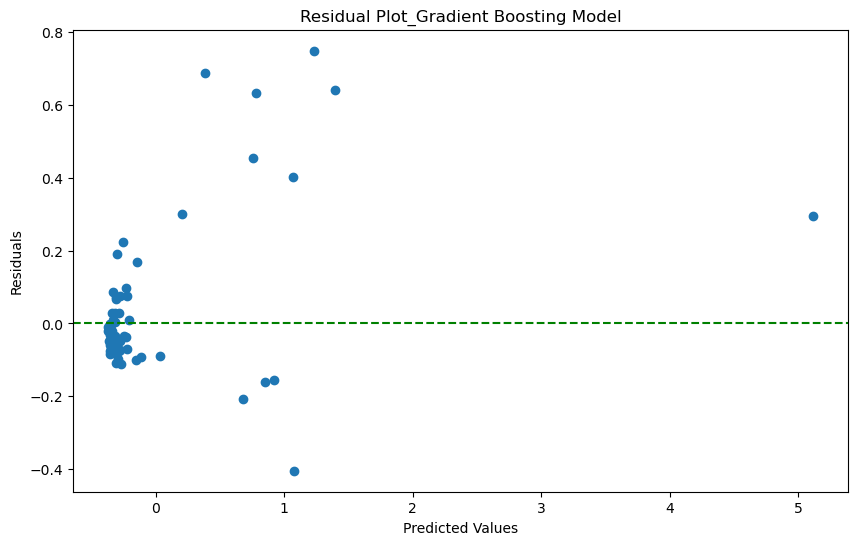

In [43]:
residuals = y_test - y_pred_gb2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf2, residuals)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot_Gradient Boosting Model')

# Save the figure
plt.savefig('plot7.png')

plt.show()

In [44]:
# Model performance metrics

metrics_hp={'Model':['Random Forest','Gradieant Boosting'],
            'Best Score': [best_score_rf,best_score_gb],
            'Test Score':[test_score_rf,test_score_gb],
            'R2':[r2_rf_2,r2_gb_2] }

data_metrics_hp= pd.DataFrame(metrics_hp)
data_metrics_hp

,Model,Best Score,Test Score,R2
0,Random Forest,0.946054,0.953138,0.953138
1,Gradieant Boosting,0.950662,0.943568,0.943568


**Centered Residuals:**

The residuals are centered around zero, which is good. It indicates that the model does not have a systematic bias and that, on average, it does not consistently over-predict or under-predict the target variable.

**Spread of Residuals:**

The residuals are more densely packed towards the lower end of the predicted values, with fewer residuals as the predicted values increase. This is common if the majority of the target values are on the lower end.
There are some residuals that are quite far from zero, indicating that the model has larger errors for some predictions.

**Outliers:**

There are a few points with very high positive and negative residuals, which can be considered outliers. These are data points where the model's predictions are significantly different from the actual values.
These outliers can impact the model's performance metrics and may warrant further investigation to understand their nature (e.g., data entry errors, special cases, etc.).

### 8.**Conclusion**

In this modeling project, multiple machine learning algorithms were applied to predict asthma-related hospital visits in New York City based on various air quality and geographical features. The models evaluated include Linear Regression, Ridge Regression, Gradient Boosting, Random Forest, and Support Vector Regression (SVR).

The performance metrics (R2, MAE, and MSE) showed that both Gradient Boosting and Random Forest performed exceptionally well, with R2 values of 0.962973 and 0.960578, respectively. These models also demonstrated lower MAE and MSE values compared to the other models, indicating better prediction accuracy and precision.

* The feature importance plots revealed that geographical features, particularly GeoType_Citywide, had the most significant impact on the predictions, followed by air quality metrics such as pm/Mean mcg/m3 and no2/Mean ppb.

* Hyperparameter tuning using Grid Search CV was performed to optimize the models. For Random Forest, the best parameters included max_depth: 10, max_features: 'sqrt', and n_estimators: 200.
For Gradient Boosting, the optimal parameters included learning_rate: 0.1, max_depth: 5, and n_estimators: 100.


* Residual plots indicated that while the models performed well, there are still some outliers.

### **9. Future Directions**

* Further explore and engineer features that could improve model performance, such as incorporating additional air quality metrics or socioeconomic factors.

* Collect more data, especially from air pollutants, different time periods or additional geographical areas, to improve model generalization.

* Explore advanced algorithms such as XGBoost, LightGBM, or neural networks to potentially capture complex relationships within the data.

* Investigating the temporal dynamics of air quality and asthma exacerbations by incorporating time-series analysis could reveal seasonal or temporal trends that are not captured by static models. This could help in understanding how different times of the year or specific weather conditions affect asthma incidence.

* Conducting more detailed geospatial analysis using advanced GIS tools could help in identifying specific areas within the city that are more prone to poor air quality and higher asthma rates. This could inform targeted interventions and policy decisions.


